# set-up

In [30]:
setwd("/storage/joypai/ms_epic/")

library(Seurat)
library(cowplot)

Loading required package: ggplot2

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



# 

In [4]:
# create individual seurat object for each sample
all_sample_dirs <- list.files(path=".", pattern="-WTA$", include.dirs = T)

seurat_obj_list <- list()
for (dir in all_sample_dirs) {
  dirname <- unlist(strsplit(dir, '-'))[1]
  print(dirname)
  data <- Read10X(data.dir = paste0(dir,"/outs/filtered_feature_bc_matrix/"))
  
  # Initialize the Seurat object with the raw (non-normalized data)
  seurat_obj <- CreateSeuratObject(counts = data, project = dirname, min.cells = 3, min.features = 200)
  # seurat_obj$sample <- dirname
  seurat_obj[["percent.mt"]] <- PercentageFeatureSet(seurat_obj, pattern = "^MT-")
  
  seurat_obj <- subset(seurat_obj, subset = nFeature_RNA > 200 & percent.mt < 10)
  seurat_obj <- NormalizeData(seurat_obj, verbose = FALSE)
  seurat_obj <- FindVariableFeatures(seurat_obj, selection.method = "vst", nfeatures = 2000)
  seurat_obj_list[[dirname]] <- seurat_obj
}

In [ ]:
# save(seurat_obj_list, file="seurat_obj_list.RData")

In [12]:
# remove sample (09102018-WTA) with too few reads
names(seurat_obj_list)
seurat_obj_list['09102018'] <- NULL

[1] 13

[1] "01092019" "03042019" "08162018" "09102018" "11132018" "6538"    
 [7] "658"      "9020"     "HC11"     "HC12"     "HC13"     "HC14"    
[13] "HC15"

[1] 12

In [ ]:
# merge datasets
immune.anchors <- FindIntegrationAnchors(object.list = seurat_obj_list, dims = 1:20)
merged.integrated <- IntegrateData(anchorset = immune.anchors, dims = 1:20)

Warning message in CheckDuplicateCellNames(object.list = object.list):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”Computing 2000 integration features
Scaling features for provided objects
Finding all pairwise anchors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 13504 anchors
Filtering anchors
	Retained 4679 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 15588 anchors
Filtering anchors
	Retained 5310 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 13744 anchors
Filtering anchors
	Retained 5029 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 14579 anchors
Filtering anchors
	Retained 3889 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 1

Merging dataset 5 into 4
Extracting anchors for merged samples
Finding integration vectors
Finding integration vector weights
Integrating data
Merging dataset 6 into 2
Extracting anchors for merged samples
Finding integration vectors
Finding integration vector weights
Integrating data
Merging dataset 9 into 2 6
Extracting anchors for merged samples
Finding integration vectors
Finding integration vector weights
Integrating data
Merging dataset 8 into 12
Extracting anchors for merged samples
Finding integration vectors
Finding integration vector weights
Integrating data
Merging dataset 12 8 into 2 6 9
Extracting anchors for merged samples
Finding integration vectors
Finding integration vector weights
Integrating data
Merging dataset 1 into 3
Extracting anchors for merged samples
Finding integration vectors
Finding integration vector weights
Integrating data
Merging dataset 11 into 2 6 9 12 8
Extracting anchors for merged samples
Finding integration vectors
Finding integration vector weig

In [17]:
# save(immune.anchors, file="immune.anchors.RData")
# save(merged.integrated, file="merged.integrated.RData")

In [6]:
load(file="r_objects/seurat_obj_list.RData")

# load(file="r_objects/immune.anchors.RData")
load(file="r_objects/merged.integrated.RData")


In [18]:

DefaultAssay(object = merged.integrated) <- "integrated"
merged.integrated <- ScaleData(object = merged.integrated, verbose = FALSE)
merged.integrated <- RunPCA(object = merged.integrated, npcs = 50, verbose = FALSE)

In [21]:
# merged.integrated <- RunUMAP(merged.integrated, reduction = "pca", dims = 1:20)
merged.integrated <- RunTSNE(object = merged.integrated, reduction = "pca", dims = 1:50)

merged.integrated <- FindNeighbors(object = merged.integrated)
merged.integrated <- FindClusters(object = merged.integrated, resolution = 0.2)


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 86983
Number of edges: 2661661

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9473
Number of communities: 10
Elapsed time: 95 seconds


In [34]:
p1 <- DimPlot(object = merged.integrated, reduction = "tsne", group.by = "orig.ident")
p2 <- DimPlot(object = merged.integrated, reduction = "tsne", group.by = "integrated_snn_res.0.2", 
              label = TRUE, repel = TRUE)

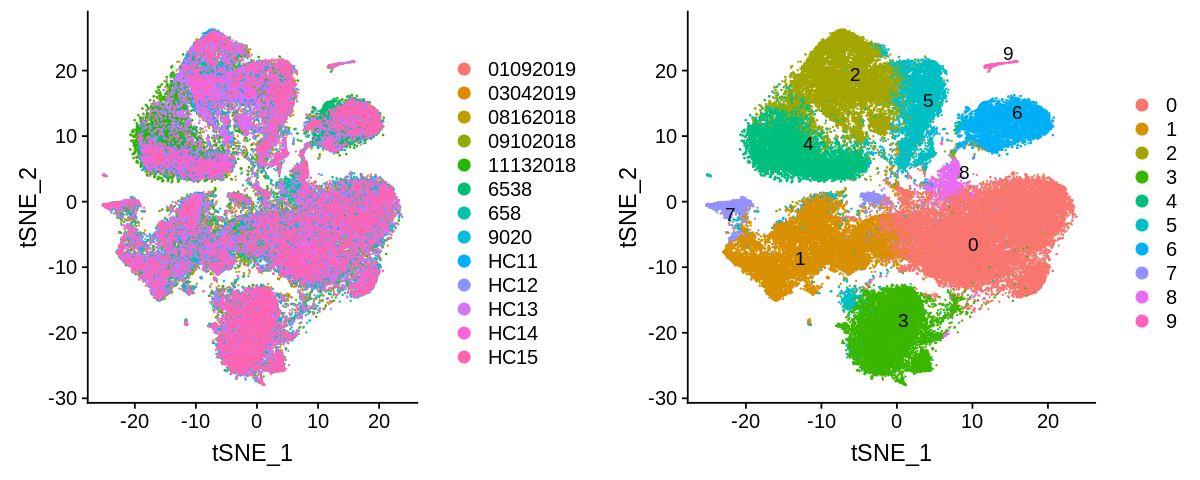

In [35]:
options(repr.plot.width=10, repr.plot.height=4)
plot_grid(p1, p2)

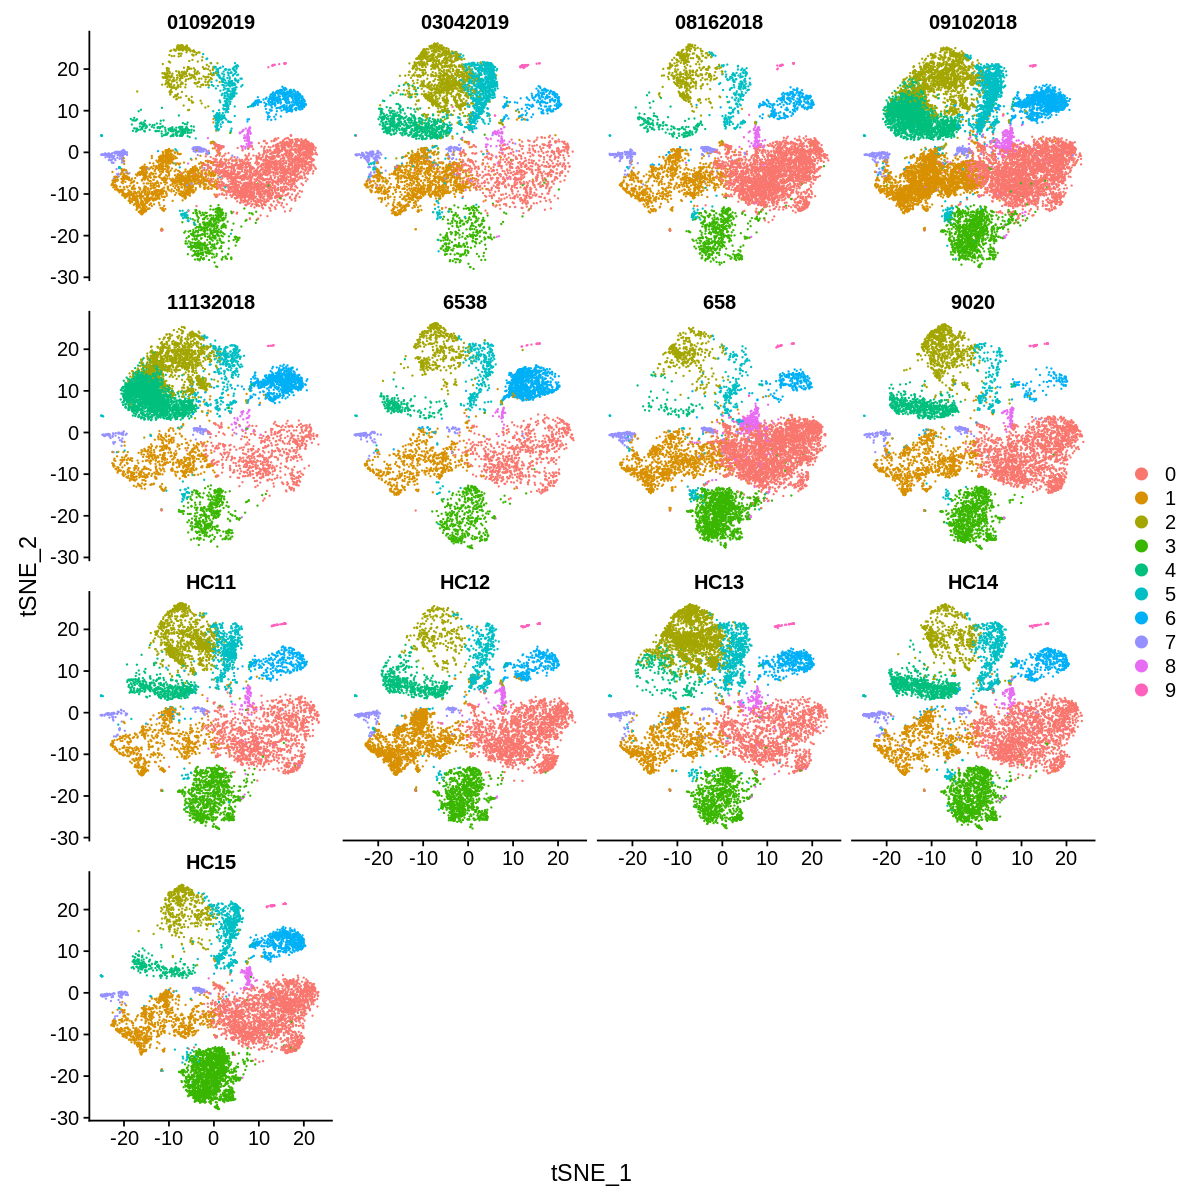

In [38]:
options(repr.plot.width=10, repr.plot.height=10)

DimPlot(merged.integrated, reduction = "tsne", split.by = "orig.ident")

In [24]:
head(merged.integrated@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,integrated_snn_res.0.2,seurat_clusters
,<chr>,<dbl>,<int>,<dbl>,<fct>,<fct>
AAACCTGAGACCTAGG_1,01092019,3620,1119,5.773481,3,3
AAACCTGAGAGTGAGA_1,01092019,4050,1262,6.172840,3,3
AAACCTGAGCACACAG_1,01092019,6253,1679,5.501359,0,0
AAACCTGAGGCTAGGT_1,01092019,3547,1165,4.567240,0,0
AAACCTGCAGTCACTA_1,01092019,6830,1832,5.183016,1,1
AAACCTGCATCGACGC_1,01092019,3211,1181,4.827157,6,6
